# Task - 1: Implementation of MCP Neurons for AND and OR Function.

In [25]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2), "Input lists must have the same length."

  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

  state_neuron = []  # Initialize an empty list to store outputs

  for x1, x2 in zip(X1, X2):
    sum_inputs = x1 + x2  # Sum the inputs
    if sum_inputs >= T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)

  return state_neuron

In [26]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")

Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [27]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2), "Input lists must have the same length."

    state_neuron = []  # Initialize an empty list to store outputs

    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

    for x1, x2 in zip(X1, X2):
        sum_inputs = x1 + x2  # Sum the inputs
        if sum_inputs >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

In [28]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")

Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


# Answer the Following Question:

## **Question - 1:** What does the shape of X represent?

The shape of X represents (n_samples, n_features) which outputs to (12665, 784). This means that there are 12665 images in the dataset and Each image is has a pixel value of 784.

## **Question - 2:** What does the shape of Y represent?

The shape of Y represents (n_samples,) which is the number of labels (rows) in the dataset (corresponds to the number of images in X).

# Task 2: Perceptron Algorithm for 0 vs 1 Classification.

## Step 1: Load the Dataset

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/6CS012 - Artificial Intelligence and Machine Learning/Week 3/Copy of mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


### Viewing the Dataset.

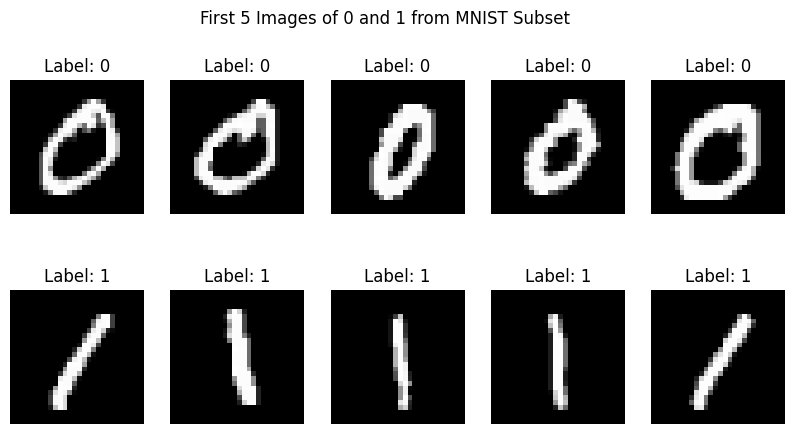

In [31]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [32]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

##**Question - 3:** What does the weights array represent in this context?

The weights array in this context, represents the importance of each pixel in the image for making predictions. Each weight corresponds to one of the 784 pixels.

## **Question - 4:** Why are we initializing the weights to zero? What effect could this have on the training process?

Initializing weights to zero ensures a fair starting point for training, avoiding bias toward any pixel.

Weights to zero can lead to slower convergence during training, as all weights start equally and may require more updates to differentiate their importance.


## Step - 3 - Make a Decision function:

In [33]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias  # Linear combination of inputs and weights
    y_pred_all = np.where(predictions >= 0, 1, 0)  # Activation function (step function)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [34]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    for epoch in range(epochs):
        correct_predictions = 0  # Track the number of correct classifications

        for i in range(len(X)):
            # Compute the prediction using the decision function
            y_pred = np.dot(X[i], weights) + bias
            y_pred = 1 if y_pred >= 0 else 0  # Apply step function

            # Update weights and bias if prediction is incorrect
            if y_pred != y[i]:
                error = y[i] - y_pred  # Compute the error
                weights += learning_rate * error * X[i]  # Update weights
                bias += learning_rate * error  # Update bias
            else:
                correct_predictions += 1  # Count correct predictions

        # Calculate accuracy in the last epoch
        if epoch == epochs - 1:
            accuracy = correct_predictions / len(X)

    return weights, bias, accuracy

## Training the Perceptron

In [35]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  1.0


## **Question - 5:** What is the purpose of the output = np.dot(X[i], weights) + bias line?

The purpose of the output = np.dot(X[i], weights) + bias is:

It computes the weighted sum of inputs and bias to make a prediction using the step function.

## **Question - 6:** What happens when the prediction is wrong? How are the weights and bias updated?

When the prediction is wrong in a perceptron, the model updates its weights and bias using the perceptron learning rule to minimize the error and improve future predictions.

**Perceptron rule:**

* weights += learning_rate * (y[i] - y_pred) * X[i]

* bias += learning_rate * (y[i] - y_pred) to reduce the error.

This iterative process continues until the perceptron correctly classifies all training examples or reaches a stopping criterion.

## **Question - 7:** Why is the final accuracy important, what do you expect it to be?

Final accuracy is important as it measures the model's performance; expect 100% accuracy for linearly separable data and less for non-separable data.

## Step 5: Visualize Misclassified Images

In [36]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


## **Question - 8:**What does misclassified idx store, and how is it used in this code?

Misclassified_idx stores the indices of missclassified samples in the dataset.

In the code, it is used to visualize misclassified images.

## **Question - 9:** How do you interpret the result if the output is ”All images were correctly classified!”?

The output ”All images were correctly classified!”, means that the perceptron has successfully learned to classify all samples in the dataset.

There are no missclassified images i.e, (len(misclassified_idx)==0)

# **Task 3:** Perceprton Algorithm for 3 vs 5 Classification.

## Step 1: Load the Dataset

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df_3_5 = pd.read_csv("/content/drive/MyDrive/6CS012 - Artificial Intelligence and Machine Learning/Week 3/Copy of mnist_3_and_5.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # 784 pixels
y = df_3_5["label"].values  # Labels (3 or 5)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


### Viewing the Dataset.

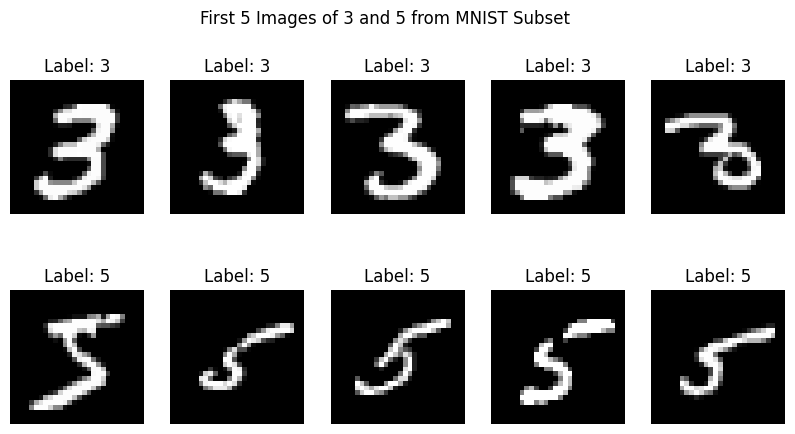

In [39]:
# Separate images for label 3 and label 5
images_3 = X[y == 3]  # Get all images with label 3
images_5 = X[y == 5]  # Get all images with label 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_3 or images_5 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 3
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 5
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [40]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [41]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias  # Linear combination of inputs and weights
    y_pred_all = np.where(predictions >= 0, 1, 0)  # Activation function (step function)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [42]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    n_samples, n_features = X.shape

    # Map labels: 3 -> 0, 5 -> 1
    y_binary = np.where(y == 3, 0, 1)

    for epoch in range(epochs):
        correct_predictions = 0  # Track correct predictions for accuracy

        for i in range(n_samples):
            # Linear combination of inputs, weights, and bias
            linear_output = np.dot(X[i], weights) + bias

            # Step function as the activation function
            y_pred = 1 if linear_output >= 0 else 0

            # Update weights and bias if the prediction is incorrect
            if y_pred != y_binary[i]:
                weights += learning_rate * (y_binary[i] - y_pred) * X[i]
                bias += learning_rate * (y_binary[i] - y_pred)

            # Count correct predictions
            if y_pred == y_binary[i]:
                correct_predictions += 1

        # Calculate accuracy for the current epoch
        accuracy = correct_predictions / n_samples
        print(f"Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.2f}")

    return weights, bias, accuracy

## Training the Perceptron

In [43]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100, Accuracy: 0.92
Epoch 2/100, Accuracy: 0.94
Epoch 3/100, Accuracy: 0.94
Epoch 4/100, Accuracy: 0.95
Epoch 5/100, Accuracy: 0.95
Epoch 6/100, Accuracy: 0.95
Epoch 7/100, Accuracy: 0.96
Epoch 8/100, Accuracy: 0.96
Epoch 9/100, Accuracy: 0.95
Epoch 10/100, Accuracy: 0.96
Epoch 11/100, Accuracy: 0.96
Epoch 12/100, Accuracy: 0.96
Epoch 13/100, Accuracy: 0.97
Epoch 14/100, Accuracy: 0.96
Epoch 15/100, Accuracy: 0.96
Epoch 16/100, Accuracy: 0.97
Epoch 17/100, Accuracy: 0.96
Epoch 18/100, Accuracy: 0.96
Epoch 19/100, Accuracy: 0.96
Epoch 20/100, Accuracy: 0.97
Epoch 21/100, Accuracy: 0.97
Epoch 22/100, Accuracy: 0.97
Epoch 23/100, Accuracy: 0.97
Epoch 24/100, Accuracy: 0.97
Epoch 25/100, Accuracy: 0.96
Epoch 26/100, Accuracy: 0.97
Epoch 27/100, Accuracy: 0.97
Epoch 28/100, Accuracy: 0.97
Epoch 29/100, Accuracy: 0.97
Epoch 30/100, Accuracy: 0.97
Epoch 31/100, Accuracy: 0.97
Epoch 32/100, Accuracy: 0.97
Epoch 33/100, Accuracy: 0.97
Epoch 34/100, Accuracy: 0.97
Epoch 35/100, Accuracy:

## Step 5: Visualize Misclassified Images

Final Accuracy: 0.0000


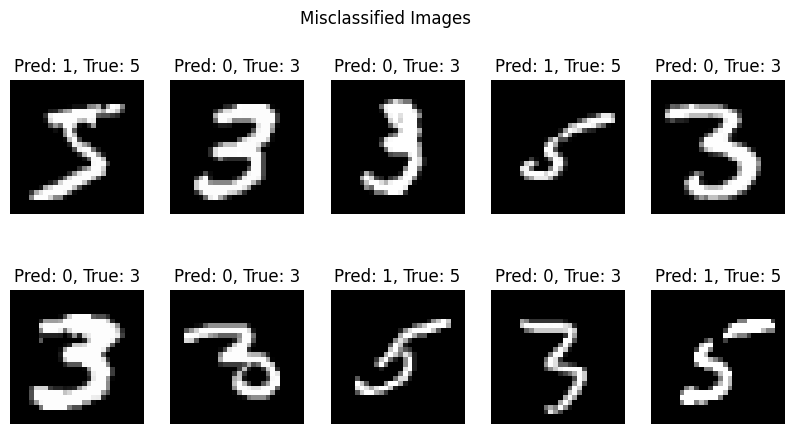

In [44]:
# Get predictions for all data points using the decision function
y_pred = decision_function(X, weights, bias)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")